## TimeSeries Forcasting Week 3 - R implementation

### Simulate Time series and look at its properties

In [1]:
##
et <- read.csv("../data/module3_data_Identifying_ARMA.csv", header = TRUE,
stringsAsFactors = FALSE)
head(et)

et
-1.2138662
-0.2854597
0.5902700
0.8285463
-0.9954260
-0.3716332


In [2]:
## mean and sd
mean(et$et)
sd(et$et)

[1] -0.02845985

[1] 0.9819995

In [3]:
newet <- rbind(et,et,et,et,et) # populate values
## generate variable for AR
yar <- rep(0, 2500)
for ( i in 2:2500 ) {
    yar[i] <- 3.00 + newet$et[i] + 0.55 * yar[i-1]
}

In [4]:
##generate variable for MA
yma <- rep(0,2500)
for (i in 2:2500) {
yma[i] <- -2.5 + newet$et[i] + 0.70 * newet$et[i-1]
}

In [5]:
## generating an arma(1,1) variable
yArma <- rep(0,2500)
for (i in 2:2500) {
    yArma[i] <- 0.5 +0.55 * yArma[i-1] + newet$et[i] + 0.70 * newet$et[i-1]
}

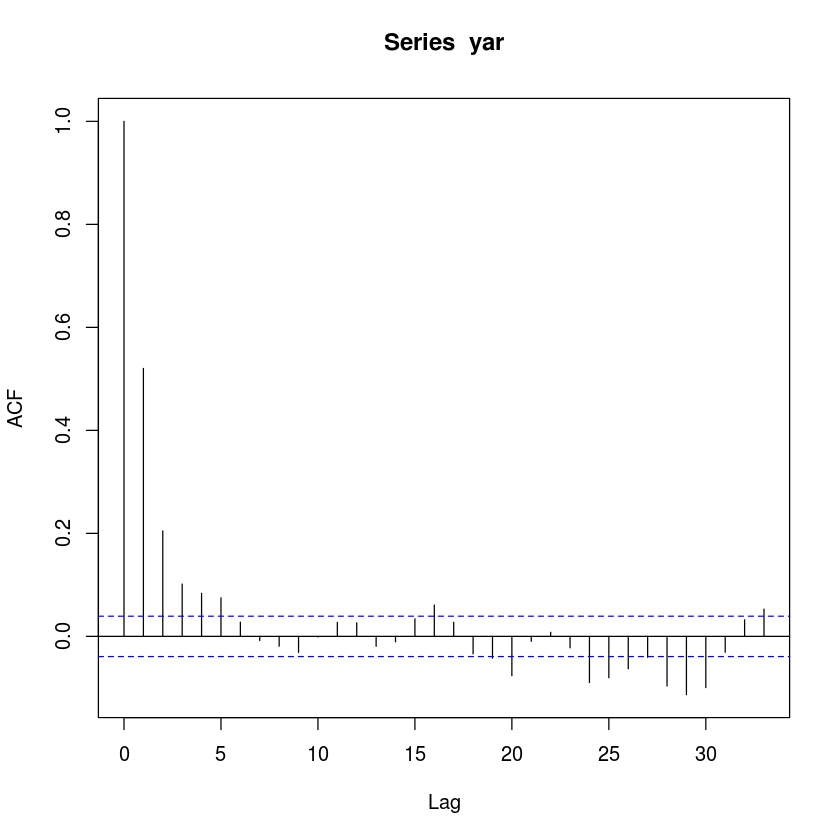

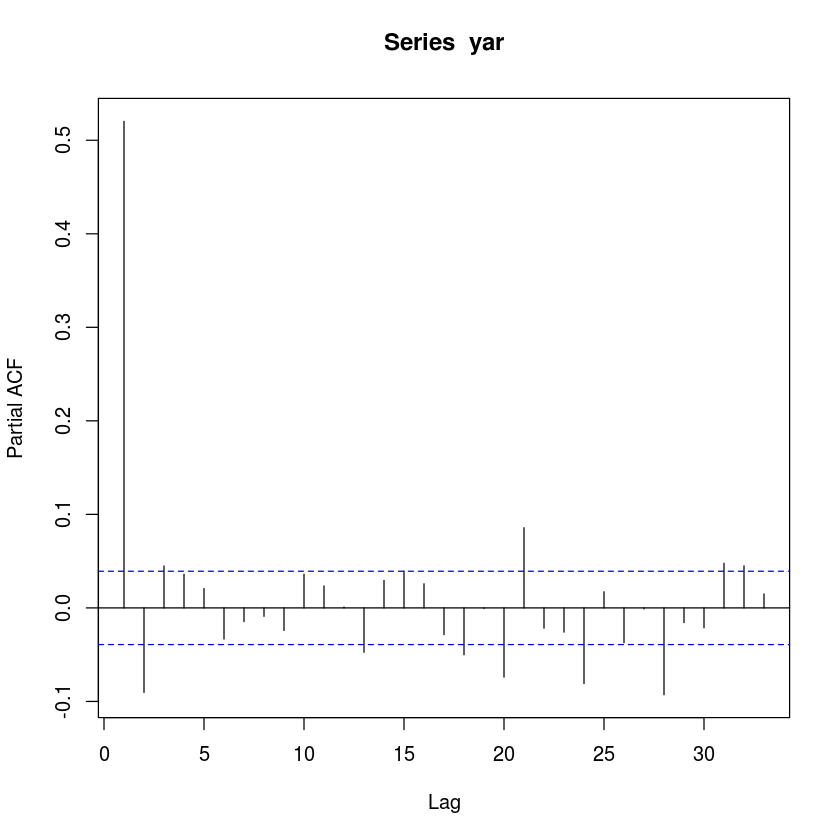

In [6]:
## plots for autocorrelation function (ACF) and partial autocorrelation function (PACF)
yaracf <- acf(yar)
yarpacf  <- pacf(yar)

In [7]:
## we can get the raw number to look at as well 
yaracf


Autocorrelations of series ‘yar’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.520  0.205  0.102  0.084  0.075  0.028 -0.008 -0.019 -0.031 -0.001 
    11     12     13     14     15     16     17     18     19     20     21 
 0.027  0.026 -0.019 -0.010  0.034  0.061  0.027 -0.034 -0.042 -0.076 -0.010 
    22     23     24     25     26     27     28     29     30     31     32 
 0.008 -0.022 -0.090 -0.080 -0.063 -0.041 -0.096 -0.113 -0.099 -0.031  0.032 
    33 
 0.053 

### Assuming stationary, AR model lag selections

In [19]:
#install.packages("dplyr")
library(dplyr)    ## load library
library(dyn)

## read data , PE Ratio data 
df <- read.csv("../data/module3_data_PE_Ratios.csv", header = T, stringsAsFactors
= F)
head(df)

dateid01,dateid,date,pe_aus,pe_ind,pe_ndo,pe_saf,pe_usa
1954-02-01,1954-02-28 23:59:59.999,1954-02-26,NA,NA,NA,NA,9.920
1954-03-01,1954-03-31 23:59:59.999,1954-03-31,NA,NA,NA,NA,10.170
1954-04-01,1954-04-30 23:59:59.999,1954-04-30,NA,NA,NA,NA,10.570
1954-05-01,1954-05-31 23:59:59.999,1954-05-31,NA,NA,NA,NA,11.000
1954-06-01,1954-06-30 23:59:59.999,1954-06-30,NA,NA,NA,NA,11.080
1954-07-01,1954-07-31 23:59:59.999,1954-07-30,NA,NA,NA,NA,12.174


In [23]:
## create another df2 with only date and pe_ind variable
df2 <- df %>% select(date, pe_ind)
head(df2)

date,pe_ind
1954-02-26,NA
1954-03-31,NA
1954-04-30,NA
1954-05-31,NA
1954-06-30,NA
1954-07-30,NA


In [26]:
## build three different models3
#model 1 = AR(1)
model1 <- arima(df$pe_ind, order = c(1L,0L,0L))
#model 2 = has AR terms at lags 1 and 8 only;
model2 <- arima(df$pe_ind, order = c(8,0,0), fixed = c(NA,0,0,0,0,0,0,NA,NA), optim.method="Nelder-Mead")
#model 3 = has AR terms at lags 1 and 8, and an MA term at lag 8.
model3 <- arima(df$pe_ind, order = c(8,0,8), fixed = c(NA,0,0,0,0,0,0,NA,0,0,0,0,0,0,0,NA,NA), optim.method="Nelder-Mead")

Warning message in arima(df$pe_ind, order = c(8, 0, 0), fixed = c(NA, 0, 0, 0, 0, :
“some AR parameters were fixed: setting transform.pars = FALSE”Warning message in arima(df$pe_ind, order = c(8, 0, 8), fixed = c(NA, 0, 0, 0, 0, :
“some AR parameters were fixed: setting transform.pars = FALSE”

In [27]:
## show the aic of three models 
model1$aic
model2$aic
model3$aic

[1] 628.2762

[1] 625.142

[1] 618.4953

We will basicall select the one with lowest AIC or BIC or HQ criteria. There is a package for auto selection in R, we can look it up.

In [28]:
## test see if there are auto corrolation in residuals 
resid1 <- residuals(model1)
Box.test (resid1 , lag = 20, type = "Ljung-Box")
## it seems that there is no auto corrolation


	Box-Ljung test

data:  resid1
X-squared = 20.507, df = 20, p-value = 0.4267


## Now, How do we know if our data is stationary or not 

Let's look at some non-stationary data 